In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = load_digits()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
data.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

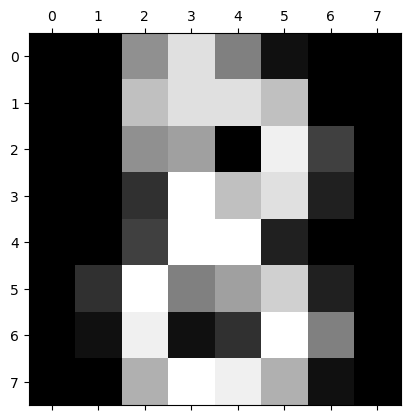

In [15]:
plt.gray()
plt.matshow(data.data[8].reshape(8,8))

In [14]:
np.unique(data.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
df = pd.DataFrame(data.data , columns=data.feature_names)

In [18]:
df["target"]=data.target

In [22]:
X = df.drop("target", axis=1)

In [23]:
y = df["target"]

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scale = MinMaxScaler()

In [24]:
scale_X = scale.fit_transform(X)

In [25]:
scale_X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(scale_X, y, test_size=0.20, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

In [33]:
model= LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9694444444444444

In [34]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(0.99)

In [61]:
scale_X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 , 0.00428888,
       0.00373606, 0.00353274, 0.00336684, 0.0032803 , 0.00308321,
       0.00293779, 0.00256589, 0.00227742, 0.00222278, 0.0021143 ,
       0.00189909])

In [65]:
pca.n_components_

41

In [62]:
X_train, X_test, y_train, y_test = train_test_split(scale_X_pca, y, test_size=0.20, random_state=42)

In [63]:
model= LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222